#Quickstart

## Install
```
# install via pip
# requires python 3; tested for python 3.4 and up
pip install pytrails 
```

# Example

Let's assume, we have observed a sequence of rainy and sunny days.
To explain what we have observed, we have two hypotheses:

* `sticky`: when it is sunny it stays sunny, and when it rains it stays rainy
* `random`: the weather is totally random

We want to test, which one of these hypotheses is more plausible given our observations.
To this end we use [HypTrails as introduced by Singer et al. in 2015](http://www.www2015.it/documents/proceedings/proceedings/p1003.pdf).

In particular, we 
* first we calculate transition counts between states
* define hypotheses as transition probability matrices
* calculate the evidence for each hypothesis using a set of increasing concentration factors


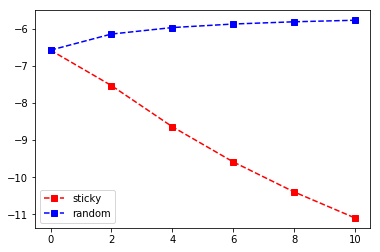

In [1]:
import numpy as np
from scipy.sparse import csr_matrix 
from pytrails.hyptrails import MarkovChain
import matplotlib.pyplot as plt

# sequence of observations (0 = rainy, 1 = sunny)
observations = [0, 1, 0, 0, 1, 0, 0, 1, 1]

########
# calculate transition counts between states
########
transition_counts = np.zeros((2, 2))
for i in range(len(observations) - 1):
    transition_counts[observations[i], observations[i+1]] += 1
transition_counts = csr_matrix(transition_counts)

########
# define hypotheses as transition probability matrices
########
hyp_sticky = csr_matrix([
    [1.0, 0.0],
    [0.0, 1.0]])
    
hyp_random = csr_matrix([
    [0.5, 0.5],
    [0.5, 0.5]])

########
# calculate the evidence for each hypothesis using a set of increasing concentration factors:
########

concentration_factors = np.array([0, 1, 2, 3, 4, 5])

# scale concentration factors by number of states
concentration_factors = concentration_factors * transition_counts.shape[0]

# calculate evidences
evidence_sticky = [MarkovChain.marginal_likelihood(transition_counts, hyp_sticky * c) for c in concentration_factors]
evidence_random = [MarkovChain.marginal_likelihood(transition_counts, hyp_random * c) for c in concentration_factors]

########
# plot the results:
########

plt.plot(concentration_factors, evidence_sticky, 'rs--', label="sticky")
plt.plot(concentration_factors, evidence_random, 'bs--', label="random")
plt.legend()
plt.show()

When comparing our results, we see that, our `random` hypothesis results in
higher evidence values (i.e., marginal likelihood). 
**That is, assuming random weather explains our observations 
better than believing in sticky conditions.**